<a href="https://colab.research.google.com/github/enwachukwu/abc/blob/main/google_stock_price_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
# Load and preprocess training data
dataset_train = pd.read_csv('/content/drive/MyDrive/DataSet/google_stock_dataset_train.csv')

In [ ]:
dataset_train.shape

(4028, 7)

In [ ]:
dataset_train.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
dataset_train.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [ ]:
dataset_train.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4028.000000,4028.000000,4028.000000,4028.000000,4.028000e+03,4028.000000
mean,566.945045,556.065319,561.553939,561.647973,6.503238e+06,561.647973
std,409.651302,401.830176,405.497113,405.920800,7.590499e+06,405.920800
min,88.866905,85.962791,87.322693,87.168274,7.922000e+03,87.168274
25%,249.021606,242.920727,246.616871,246.508522,1.666089e+06,246.508522
50%,376.207382,368.257172,370.307007,370.972015,3.968118e+06,370.972015
75%,803.977478,793.692520,799.684998,798.019989,8.207298e+06,798.019989
max,1847.199951,1822.650024,1824.520020,1827.989990,8.254163e+07,1827.989990


In [ ]:
dataset_train.isna()

,Date,High,Low,Open,Close,Volume,Adj Close
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4023,False,False,False,False,False,False,False
4024,False,False,False,False,False,False,False
4025,False,False,False,False,False,False,False
4026,False,False,False,False,False,False,False


In [ ]:
dataset_train.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
dataset_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4023    False
4024    False
4025    False
4026    False
4027    False
Length: 4028, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

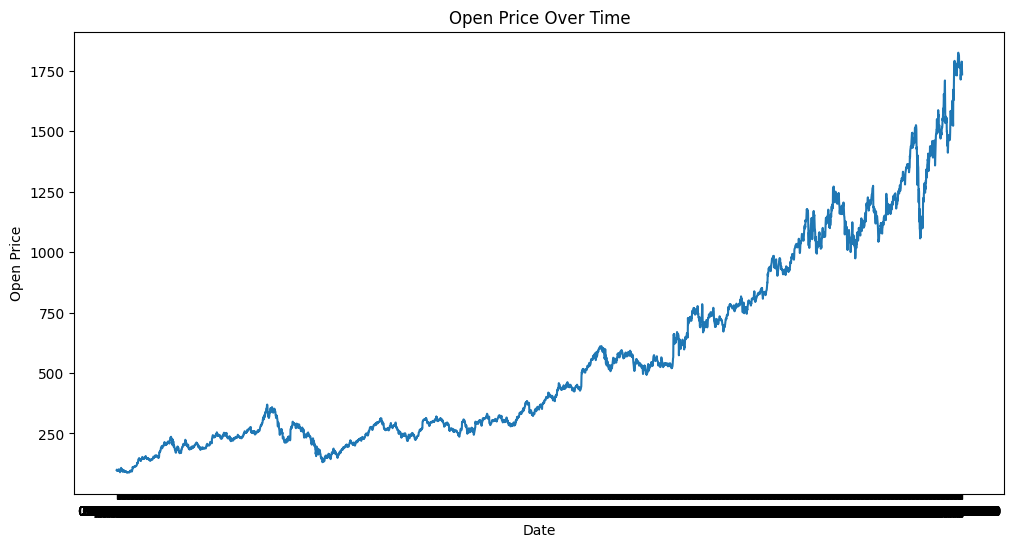

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dataset_train['Date'], dataset_train['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.show

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train, y_train = [], []

In [ ]:
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.1))

In [ ]:
#regressor.add(LSTM(units=50, return_sequences=True))
#regressor.add(Dropout(0.1))

In [ ]:
#regressor.add(LSTM(units=50, return_sequences=True))
#regressor.add(Dropout(0.1))

In [ ]:
#regressor.add(LSTM(units=50, return_sequences=True))
#regressor.add(Dropout(0.1))

In [ ]:
#regressor.add(LSTM(units=50, return_sequences=True))
#regressor.add(Dropout(0.1))

In [ ]:
#regressor.add(LSTM(units=50))
#regressor.add(Dropout(0.1))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#from keras.optimizers import Adam

# Create an instance of Adam optimizer with a custom learning rate
#custom_optimizer = Adam(learning_rate=0.001)

In [ ]:
# Compile the RNN with the custom optimizer
#regressor.compile(optimizer=custom_optimizer, loss='mean_squared_error')

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
124/124 [==============================] - 6s 24ms/step - loss: 0.1071
Epoch 2/100
124/124 [==============================] - 3s 21ms/step - loss: 0.0093
Epoch 3/100
124/124 [==============================] - 3s 21ms/step - loss: 0.0077
Epoch 4/100
124/124 [==============================] - 3s 20ms/step - loss: 0.0075
Epoch 5/100
124/124 [==============================] - 4s 32ms/step - loss: 0.0064
Epoch 6/100
124/124 [==============================] - 4s 33ms/step - loss: 0.0062
Epoch 7/100
124/124 [==============================] - 3s 21ms/step - loss: 0.0060
Epoch 8/100
124/124 [==============================] - 3s 20ms/step - loss: 0.0050
Epoch 9/100
124/124 [==============================] - 3s 20ms/step - loss: 0.0053
Epoch 10/100
124/124 [==============================] - 3s 20ms/step - loss: 0.0052
Epoch 11/100
124/124 [==============================] - 4s 32ms/step - loss: 0.0050
Epoch 12/100
124/124 [==============================] - 4s 34ms/step - loss: 0.0049
E

In [ ]:
# Load and preprocess test data
dataset_test = pd.read_csv('/content/drive/MyDrive/DataSet/google_stock_dataset_test.csv')
original_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 79):
    x_test.append(inputs[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Predict stock prices
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

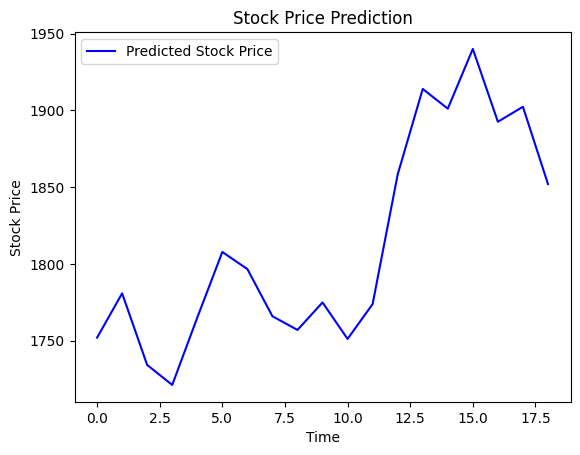

In [ ]:
# Visualize the results
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

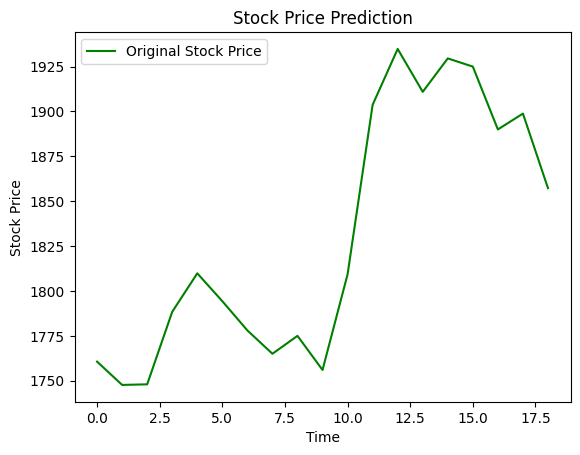

In [ ]:
plt.plot(original_stock_price, color='green', label='Original Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()